In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import umap
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data

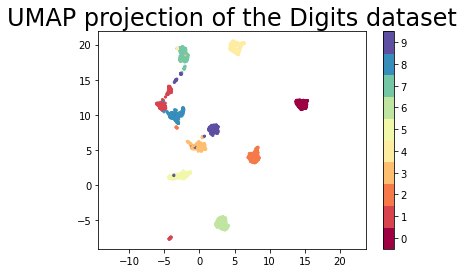

In [ ]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# 4

In [ ]:
# 4.1
mean_imgs = np.array([digits.data[digits.target==i].mean(axis=0) for i in range(10)])
#print(len(mean_imgs))
l2norm_imgs = [np.linalg.norm(mean_imgs, ord=2) for x in digits.data]
#print((l2norm_imgs))

In [ ]:
# 4.2
l2norm = [np.linalg.norm(x, ord=2) for x in digits.data]
len(l2norm)
print(len(digits.data))

1797


In [ ]:
# 4.3
cos=[]
for i in range(len(digits.data)):
  abs1 = np.linalg.norm(digits.data[i], ord=2)
  val = digits.data[i]
  temp = []
  for j in range(len(mean_imgs)):
    abs2 = l2norm_imgs[j]
    multi = np.dot(val, mean_imgs[j])
    multi2 = abs1*abs2
    temp.append(multi/(abs1*abs2))
  cos.append(temp)

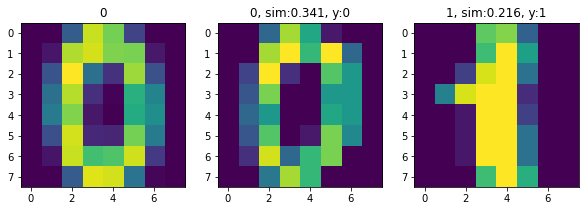

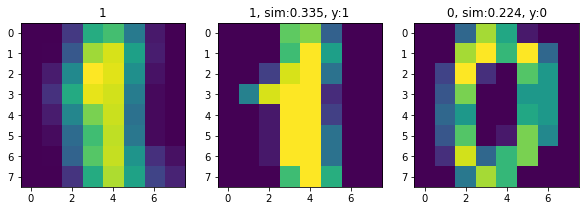

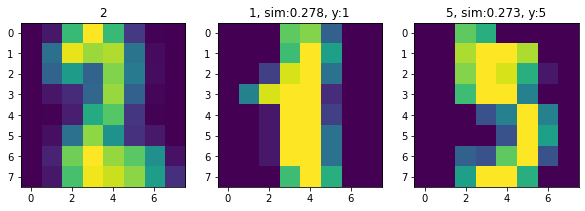

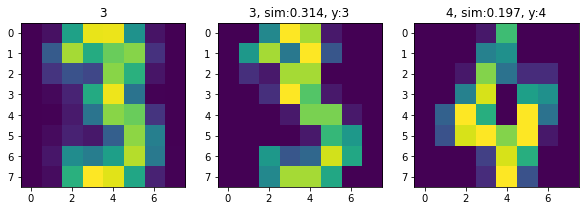

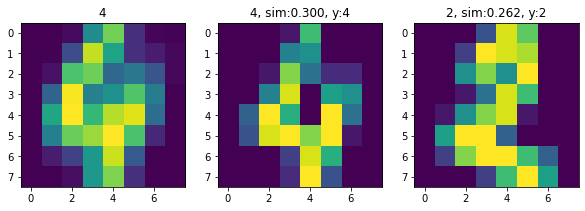

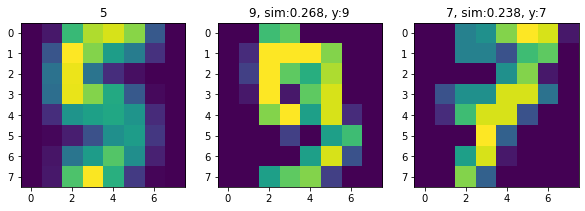

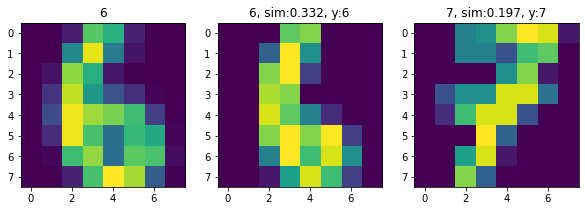

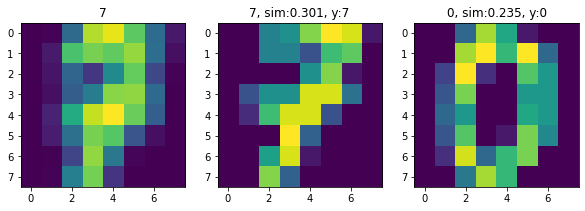

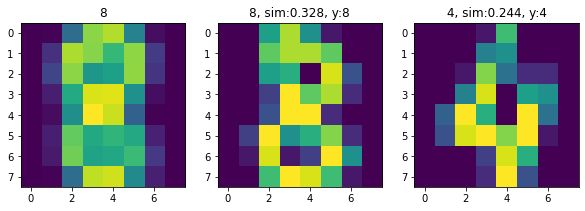

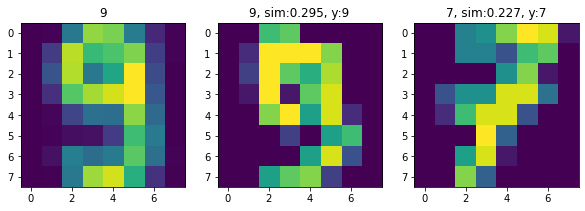

In [ ]:
#4.4
for i in range(0, 10):
    min_idx = np.argmin(cos[:][i])
    max_idx = np.argmax(cos[:][i])

    fig, axs = plt.subplots(1,3,figsize=(10,10))
    
    # reference image
    axs[0].set_title(f"{i}")        
    axs[0].imshow(mean_imgs[i].reshape(8,8))
    
    # image and data with highest similarity to reference
    axs[1].set_title(f"{max_idx}, sim:{cos[max_idx][i]:.3f}, y:{digits.target[max_idx]}")
    axs[1].imshow(X[max_idx].reshape(8,8))
    
    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, sim:{cos[min_idx][i]:.3f}, y:{digits.target[min_idx]}")
    axs[2].imshow(X[min_idx].reshape(8,8))

plt.show()

# 5

In [ ]:
l = len(digits.target)
trainSize = round(0.7*l)
testSize = 0.3*l

trainDigits = digits.data[:trainSize]
trainTarget = digits.target[:trainSize]

testDigits = digits.data[trainSize:]
testTarget = digits.target[trainSize:]
print(len(trainDigits))
print(len(testDigits))

1258
539


## 6

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
classif = KNeighborsClassifier(n_neighbors=5, algorithm='brute')

classif.fit(trainDigits, trainTarget)

KNeighborsClassifier(algorithm='brute')

In [ ]:
pred = classif.predict(testDigits)

In [ ]:
metrics.classification_report(testTarget, pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98        53\n           1       0.95      0.98      0.96        53\n           2       0.98      0.96      0.97        53\n           3       0.96      0.92      0.94        53\n           4       0.98      0.96      0.97        56\n           5       0.95      0.98      0.96        56\n           6       0.98      1.00      0.99        54\n           7       0.95      1.00      0.97        54\n           8       0.96      0.90      0.93        52\n           9       0.96      0.95      0.95        55\n\n    accuracy                           0.96       539\n   macro avg       0.96      0.96      0.96       539\nweighted avg       0.96      0.96      0.96       539\n'

In [ ]:
metrics.confusion_matrix(testTarget, pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 49,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 47,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 52]])

# 7

In [ ]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=10).fit(trainDigits)

In [ ]:
predKmean = kmean.predict(testDigits)

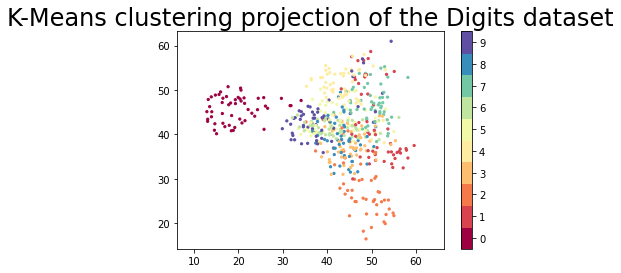

In [ ]:
#kmean.cluster_centers_

embedding = kmean.transform(testDigits)

plt.scatter(embedding[:, 0], embedding[:, 1], c=testTarget, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('K-Means clustering projection of the Digits dataset', fontsize=24);

In [ ]:
print(metrics.completeness_score(testTarget, predKmean))
print(metrics.homogeneity_score(testTarget, predKmean))
print(metrics.adjusted_mutual_info_score(testTarget, predKmean))

0.7504861421156868
0.7372252465190106
0.7345600549869864


In [ ]:

metrics.homogeneity_score(testTarget, predKmean)

0.7372252465190106

In [ ]:
metrics.adjusted_mutual_info_score(testTarget, predKmean)

0.7345600549869864